In [6]:
pip install gymnasium[atari,accept-rom-license]==0.28.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 22.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 925.5/925.5 kB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 57.6 MB/s eta 0:00:00
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446660 sha256=ee6f598ad06cf0fccebf66aaf723042cf3ebf22695fd4fe2dcd25ad430d47e38
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license
  Attempting uninstall: gymnasium
    Found existing installation: gymnasium 1.0.0
    Uninstalling gymnasium-1.0.0:
      Successfully uninstalled gymnasium-1.0.0


# Question 2

In [4]:
import numpy as np
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
import random
import gymnasium as gym
import copy

## a)

CARTPOLE-V1
State Space: Box([-4.8               -inf -0.41887903        -inf], [4.8               inf 0.41887903        inf], (4,), float32)
Action Space: Discrete(2)


Done=True, Last state shape=(4,), Last step Reward=1.0
Episode 1: Total Reward = 13.0: Total steps = 13

Done=True, Last state shape=(4,), Last step Reward=1.0
Episode 2: Total Reward = 17.0: Total steps = 17

Done=True, Last state shape=(4,), Last step Reward=1.0
Episode 3: Total Reward = 19.0: Total steps = 19

Done=True, Last state shape=(4,), Last step Reward=1.0
Episode 4: Total Reward = 12.0: Total steps = 12

Done=True, Last state shape=(4,), Last step Reward=1.0
Episode 5: Total Reward = 33.0: Total steps = 33

Average Reward: 18.8


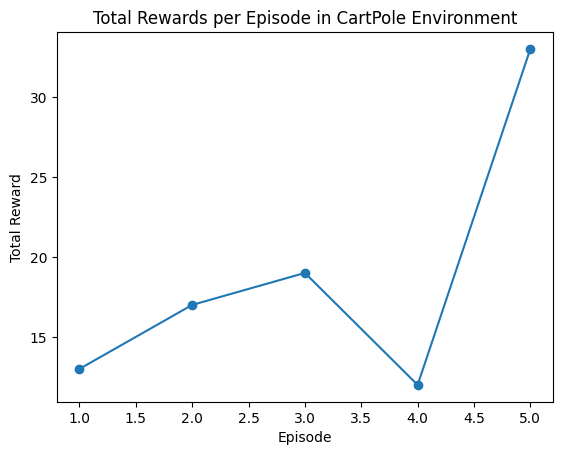

In [4]:
env = gym.make("CartPole-v1")
print("CARTPOLE-V1")
print("State Space:", env.observation_space)
print("Action Space:", env.action_space)
print("\n")

total_reward = 0
num_episodes = 5
episode_rewards = []

for episode in range(num_episodes):
    state = env.reset()
    done = False
    episode_reward = 0
    n_steps = 0

    while not done:
        action = env.action_space.sample()
        next_state, reward, terminated, truncated, _ = env.step(action)
        episode_reward += reward
        n_steps += 1
        done = terminated or truncated

    total_reward += episode_reward
    episode_rewards.append(episode_reward)
    print(f"Done={done}, Last state shape={np.array(next_state).shape}, Last step Reward={reward}")
    print(f"Episode {episode + 1}: Total Reward = {episode_reward}: Total steps = {n_steps}\n")


average_reward = total_reward / num_episodes
print("Average Reward:", average_reward)
plt.plot(range(1, num_episodes + 1), episode_rewards, marker='o')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Rewards per Episode in CartPole Environment")
plt.show()


### Observations on CartPole-v1 Results

1. **Episode Performance**: The total reward per episode varies, with Episode 5 achieving the highest reward (33) and Episode 4 the lowest (12). This suggests that the agent is still in the early stages of learning and is not consistently balancing the pole for extended periods.

2. **Average Reward**: The average reward across the five episodes is 18.8, which is relatively low for CartPole-v1. A reward above 200 typically indicates successful balancing, so the agent likely requires further training or tuning.

3. **Learning Progress**: The fluctuations in rewards indicate some improvement (e.g., from 13 in Episode 1 to 33 in Episode 5), suggesting the agent may be slowly learning. However, the variability also hints at inconsistencies in the policy or exploration-exploitation strategy.

In [13]:
pip install "gymnasium[box2d]"

  Using cached box2d-py-2.3.5.tar.gz (374 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2376132 sha256=47ac04e97ae27d4f368cdf61f90edf5a7f745f1bb4afe8448aa9304d5eed445d
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py


In [12]:
pip install swig

  Using cached swig-4.2.1.post0-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl.metadata (3.5 kB)
Using cached swig-4.2.1.post0-py2.py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.whl (1.8 MB)


Lunar Lander
State Space: Box([ -2.5        -2.5       -10.        -10.         -6.2831855 -10.
  -0.         -0.       ], [ 2.5        2.5       10.        10.         6.2831855 10.
  1.         1.       ], (8,), float32)
Action Space: Discrete(4)


Done=True, Last state shape=(8,), Last step Reward=-100
Episode 1: Total Reward = -85.96172159785414: Total steps = 82

Done=True, Last state shape=(8,), Last step Reward=-100
Episode 2: Total Reward = -339.40641750662155: Total steps = 107

Done=True, Last state shape=(8,), Last step Reward=-100
Episode 3: Total Reward = -158.8752395813317: Total steps = 81

Done=True, Last state shape=(8,), Last step Reward=-100
Episode 4: Total Reward = -406.3132506636316: Total steps = 81

Done=True, Last state shape=(8,), Last step Reward=-100
Episode 5: Total Reward = -116.42228265221193: Total steps = 126

Average Reward: -221.39578240033015


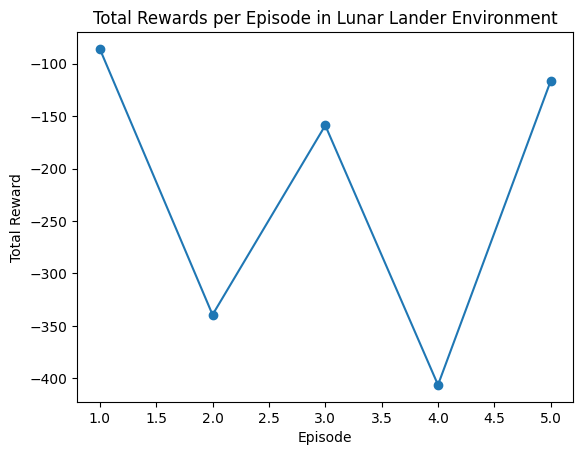

In [9]:
env = gym.make("LunarLander-v3")
print("Lunar Lander")
print("State Space:", env.observation_space)
print("Action Space:", env.action_space)
print("\n")

total_reward = 0
num_episodes = 5
episode_rewards = []

for episode in range(num_episodes):
    state = env.reset()
    done = False
    episode_reward = 0
    n_steps = 0

    while not done:
        action = env.action_space.sample()
        next_state, reward, terminated, truncated, _ = env.step(action)
        episode_reward += reward
        n_steps += 1
        done = terminated or truncated

    total_reward += episode_reward
    episode_rewards.append(episode_reward)
    print(f"Done={done}, Last state shape={np.array(next_state).shape}, Last step Reward={reward}")
    print(f"Episode {episode + 1}: Total Reward = {episode_reward}: Total steps = {n_steps}\n")


average_reward = total_reward / num_episodes
print("Average Reward:", average_reward)
plt.plot(range(1, num_episodes + 1), episode_rewards, marker='o')
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Total Rewards per Episode in Lunar Lander Environment")
plt.show()



### Observations on Lunar Lander Results

1. **Episode Performance**: The rewards are generally negative, with a wide range from -85.96 in Episode 1 to -406.31 in Episode 4. This reflects the challenging nature of Lunar Lander, where poorly controlled landings result in substantial penalties.

2. **Average Reward**: The average reward of -221.4 is considerably low, indicating that the agent is struggling with the task. It suggests that the current policy is not effective in achieving stable landings.

3. **Instability in Results**: The high variance in rewards suggests that the agent’s actions lead to widely different outcomes in each episode, possibly due to a lack of control over the descent and landing. Further refinement of the agent's policy is needed to achieve a more stable and successful landing approach.




## b)

In [6]:
import torch as T
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import gym

class PolicyNetwork(nn.Module):
    def __init__(self, state_size, action_size):
        super(PolicyNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(state_size, 32),
            nn.ReLU(),
            nn.Linear(32, action_size),
            nn.Softmax(dim=-1)
        )

    def forward(self, state):
        return self.model(state)

class VanillaPolicyGradient:
    def __init__(self, env_name, n_train_iterations, batch_size, gamma=0.99, lr=0.003):
        self.env = gym.make(env_name)
        self.state_size = self.env.observation_space.shape[0]
        self.action_size = self.env.action_space.n
        self.n_train_iterations = n_train_iterations
        self.batch_size = batch_size
        self.gamma = gamma
        self.lr = lr
        self.policy = PolicyNetwork(self.state_size, self.action_size)
        self.optimizer = T.optim.Adam(self.policy.parameters(), lr=lr)

    def train(self, evaluation_freq=5, reward_to_go=True, advantage_normalisation=True):
        avg_return_plot, eval_avg_return_plot = [], []

        for epoch in range(self.n_train_iterations):
            trajectories = self.sample_trajectories()
            avg_return_plot.append(np.mean([np.sum(rewards) for _, _, rewards in trajectories]))


            G = self.calculate_returns(trajectories, reward_to_go)
            A = self.calculate_advantages(G, advantage_normalisation)


            self.update_policy(trajectories, A)


            if epoch % evaluation_freq == 0:
                avg_return = self.evaluate_policy(10)
                eval_avg_return_plot.append(avg_return)
                if epoch % 10 == 0:
                    print(f"Epoch {epoch} : The average return of 10 evaluation episodes is : {avg_return}")

        return avg_return_plot, eval_avg_return_plot

    def sample_trajectories(self):
        trajectories = []
        for _ in range(self.batch_size):
            states, actions, rewards = [], [], []
            state = self.env.reset()
            done = False
            while not done:
                action_prob = self.policy(T.tensor(state, dtype=T.float32)).detach().numpy()
                action = np.random.choice(self.action_size, p=action_prob)
                next_state, reward, done, _ = self.env.step(action)

                states.append(state)
                actions.append(action)
                rewards.append(reward)
                state = next_state

            trajectories.append((states, actions, rewards))
        return trajectories

    def calculate_returns(self, trajectories, reward_to_go):
        G = []
        for _, _, rewards in trajectories:
            episode_length = len(rewards)
            discounts = np.array([self.gamma ** i for i in range(episode_length)])
            if reward_to_go:
                G_episode = [np.sum(np.array(rewards[i:]) * discounts[:episode_length - i]) for i in range(episode_length)]
            else:
                total_return = np.sum(rewards)
                G_episode = [total_return * discounts[0]] * episode_length
            G.append(G_episode)
        return G

    def calculate_advantages(self, G, normalise):
        mean_baseline = np.mean([np.sum(g) for g in G])
        advantages = [[g - mean_baseline for g in G_episode] for G_episode in G]

        if normalise:
            for i, adv in enumerate(advantages):
                mean, std = np.mean(adv), np.std(adv)
                advantages[i] = [(a - mean) / (std + 1e-8) for a in adv]
        return advantages

    def update_policy(self, trajectories, advantages):
        self.optimizer.zero_grad()
        loss = T.tensor(0.0)

        for i, (states, actions, _) in enumerate(trajectories):
            for j, state in enumerate(states):
                state_tensor = T.tensor(state, dtype=T.float32)
                action_probs = self.policy(state_tensor)
                log_prob = T.log(action_probs[actions[j]])
                loss += -log_prob * advantages[i][j]

        loss = loss / self.batch_size
        loss.backward()
        self.optimizer.step()

    def evaluate_policy(self, num_eval_episodes=5):
        total_rewards = 0
        for _ in range(num_eval_episodes):
            state = self.env.reset()
            done = False
            while not done:
                action_prob = self.policy(T.tensor(state, dtype=T.float32)).detach().numpy()
                action = np.random.choice(self.action_size, p=action_prob)
                next_state, reward, done, _ = self.env.step(action)

                total_rewards += reward
                state = next_state

        return total_rewards / num_eval_episodes




## Lunar Lander

############TRAINING FOR CASE-1 : With Advantage Norm & Reward-to-Go#################
Epoch 0 : The average return of 10 evaluation episodes is : -174.71046546281212
Epoch 10 : The average return of 10 evaluation episodes is : -167.92169671522936
Epoch 20 : The average return of 10 evaluation episodes is : -140.1081053825836
Epoch 30 : The average return of 10 evaluation episodes is : -101.74360016048495
Epoch 40 : The average return of 10 evaluation episodes is : -33.5774940794289
Epoch 50 : The average return of 10 evaluation episodes is : -14.105765389437385
Epoch 60 : The average return of 10 evaluation episodes is : -19.515968773871037
Epoch 70 : The average return of 10 evaluation episodes is : 20.37221624086315
Epoch 80 : The average return of 10 evaluation episodes is : 5.786520261092397
Epoch 90 : The average return of 10 evaluation episodes is : 89.46709288771385
Epoch 100 : The average return of 10 evaluation episodes is : 99.14225822161478
Epoch 110 : The average return of 

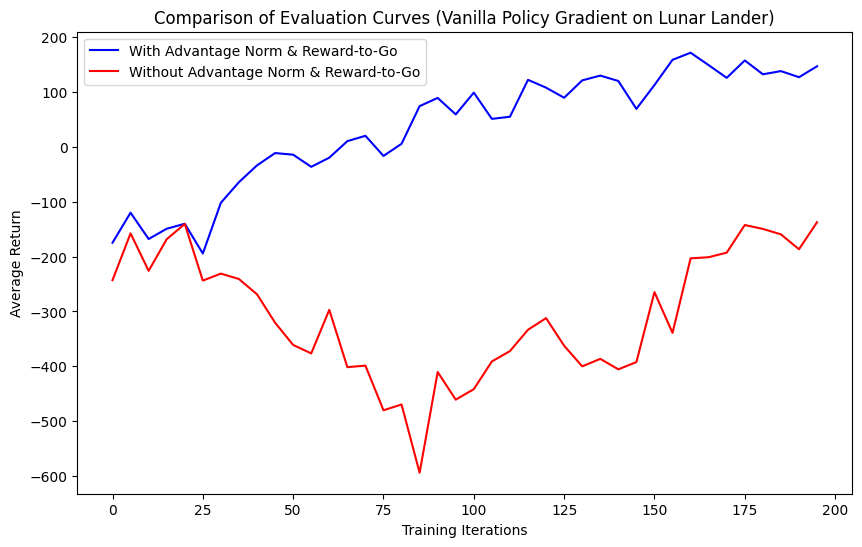

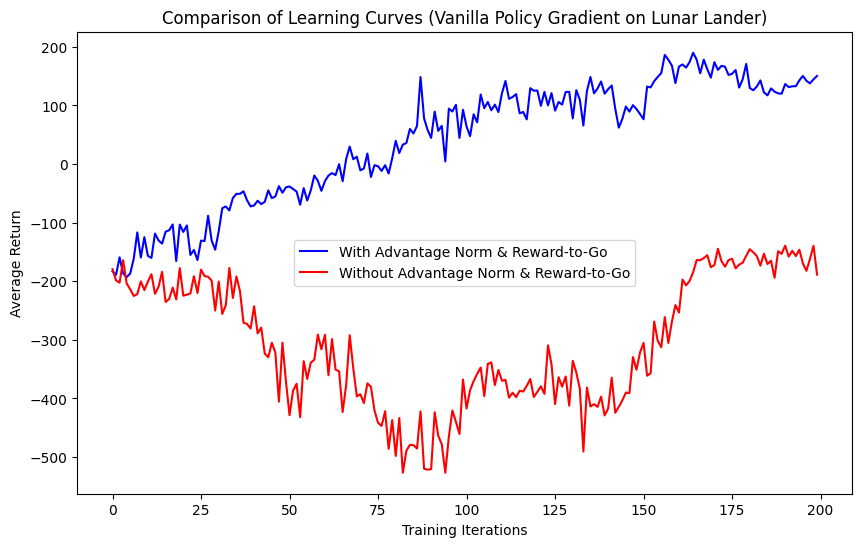

In [16]:
env_name = "LunarLander-v2"
n_train_iterations = 200
n_trajectories_per_iter = 20
evaluation_freq = 5
lr = 0.01

vpg = VanillaPolicyGradient(env_name, n_train_iterations, n_trajectories_per_iter, gamma=0.99, lr=lr)

print("############TRAINING FOR CASE-1 : With Advantage Norm & Reward-to-Go#################")


learning_curve_with_adv_norm, eval_curve_with_adv_norm = vpg.train(
    evaluation_freq=evaluation_freq, reward_to_go=True, advantage_normalisation=True
)

print("###########TRAINING FOR CASE-2 : Without Advantage Norm & Reward-to-Go###############")


vpg = VanillaPolicyGradient(env_name, n_train_iterations, n_trajectories_per_iter, gamma=0.99, lr=lr)


learning_curve_without_adv_norm, eval_curve_without_adv_norm = vpg.train(
    evaluation_freq=evaluation_freq, reward_to_go=False, advantage_normalisation=False
)


x = np.arange(0, n_train_iterations, evaluation_freq)
plt.figure(figsize=(10, 6))
plt.plot(x, eval_curve_with_adv_norm, 'b-', label="With Advantage Norm & Reward-to-Go")
plt.plot(x, eval_curve_without_adv_norm, 'r-', label="Without Advantage Norm & Reward-to-Go")
plt.xlabel("Training Iterations")
plt.ylabel("Average Return")
plt.legend()
plt.title("Comparison of Evaluation Curves (Vanilla Policy Gradient on Lunar Lander)")
plt.show()

x = np.arange(0, n_train_iterations)
plt.figure(figsize=(10, 6))
plt.plot(x, learning_curve_with_adv_norm, 'b-', label="With Advantage Norm & Reward-to-Go")
plt.plot(x, learning_curve_without_adv_norm, 'r-', label="Without Advantage Norm & Reward-to-Go")
plt.xlabel("Training Iterations")
plt.ylabel("Average Return")
plt.legend()
plt.title("Comparison of Learning Curves (Vanilla Policy Gradient on Lunar Lander)")
plt.show()

- **Observation on Policy Gradient with Advantage Normalization and Reward-to-Go**:
  The graph demonstrates that the policy gradient implementation with advantage normalization and reward-to-go (blue curve) significantly improves performance on the Lunar Lander environment. The agent trained with these techniques achieves higher average returns and exhibits faster learning compared to the baseline version without these enhancements (red curve), which remains at lower returns and shows less stable performance over iterations.


############TRAINING FOR CASE-1 : With Advantage Norm & Reward-to-Go#################
Epoch 0 : The average return of 10 evaluation episodes is : 22.9
Epoch 10 : The average return of 10 evaluation episodes is : 57.9
Epoch 20 : The average return of 10 evaluation episodes is : 69.0
Epoch 30 : The average return of 10 evaluation episodes is : 138.9
Epoch 40 : The average return of 10 evaluation episodes is : 416.7
Epoch 50 : The average return of 10 evaluation episodes is : 488.9
Epoch 60 : The average return of 10 evaluation episodes is : 447.3
Epoch 70 : The average return of 10 evaluation episodes is : 479.3
Epoch 80 : The average return of 10 evaluation episodes is : 495.9
Epoch 90 : The average return of 10 evaluation episodes is : 444.3
Epoch 100 : The average return of 10 evaluation episodes is : 463.1
Epoch 110 : The average return of 10 evaluation episodes is : 500.0
###########TRAINING FOR CASE-2 : Without Advantage Norm & Reward-to-Go###############
Epoch 0 : The average retu

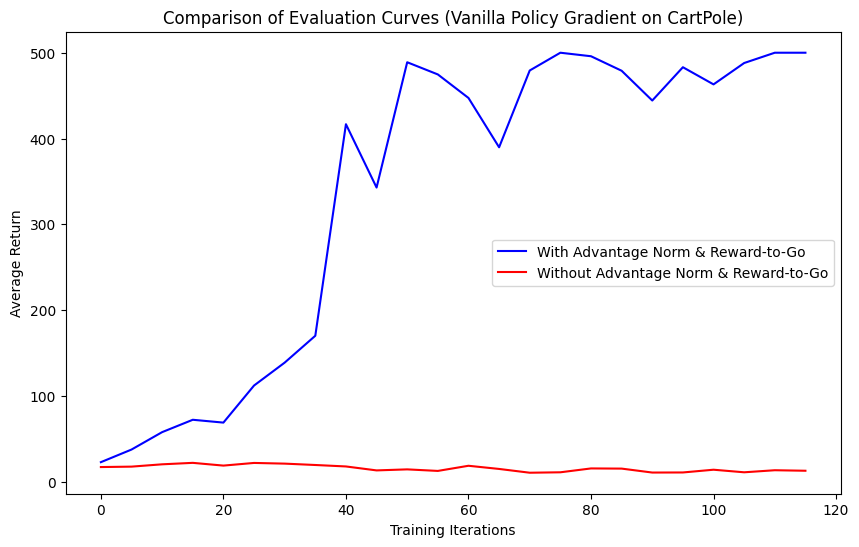

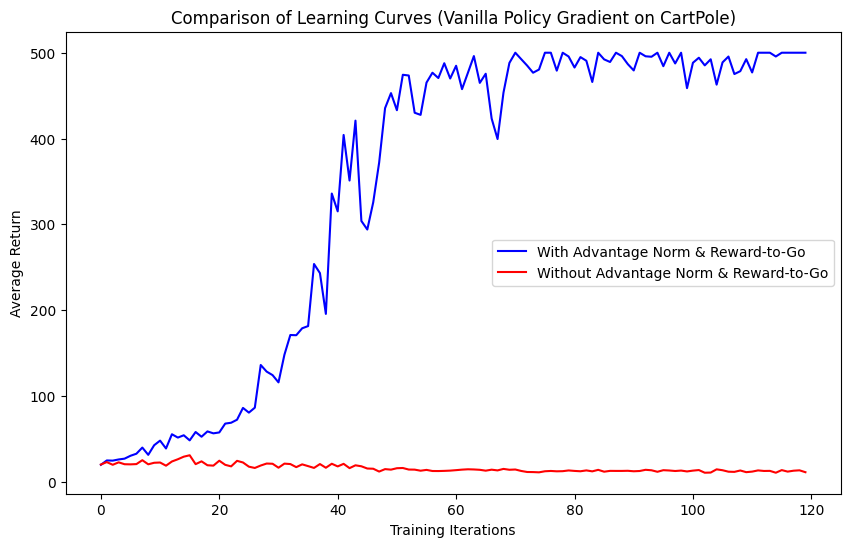

In [21]:
env_name = "CartPole-v1"
n_train_iterations = 120
n_trajectories_per_iter = 20
evaluation_freq = 5
lr = 0.01


vpg = VanillaPolicyGradient(env_name, n_train_iterations, n_trajectories_per_iter, gamma=0.99, lr=lr)

print("############TRAINING FOR CASE-1 : With Advantage Norm & Reward-to-Go#################")


learning_curve_with_adv_norm, eval_curve_with_adv_norm = vpg.train(
    evaluation_freq=evaluation_freq, reward_to_go=True, advantage_normalisation=True
)

print("###########TRAINING FOR CASE-2 : Without Advantage Norm & Reward-to-Go###############")


vpg = VanillaPolicyGradient(env_name, n_train_iterations, n_trajectories_per_iter, gamma=0.99, lr=lr)

learning_curve_without_adv_norm, eval_curve_without_adv_norm = vpg.train(
    evaluation_freq=evaluation_freq, reward_to_go=False, advantage_normalisation=False
)


x = np.arange(0, n_train_iterations, evaluation_freq)
plt.figure(figsize=(10, 6))
plt.plot(x, eval_curve_with_adv_norm, 'b-', label="With Advantage Norm & Reward-to-Go")
plt.plot(x, eval_curve_without_adv_norm, 'r-', label="Without Advantage Norm & Reward-to-Go")
plt.xlabel("Training Iterations")
plt.ylabel("Average Return")
plt.legend()
plt.title("Comparison of Evaluation Curves (Vanilla Policy Gradient on CartPole)")
plt.show()

x = np.arange(0, n_train_iterations)
plt.figure(figsize=(10, 6))
plt.plot(x, learning_curve_with_adv_norm, 'b-', label="With Advantage Norm & Reward-to-Go")
plt.plot(x, learning_curve_without_adv_norm, 'r-', label="Without Advantage Norm & Reward-to-Go")
plt.xlabel("Training Iterations")
plt.ylabel("Average Return")
plt.legend()
plt.title("Comparison of Learning Curves (Vanilla Policy Gradient on CartPole)")
plt.show()

- **Observation on Policy Gradient with Advantage Normalization and Reward-to-Go (CartPole)**:
  In the CartPole environment, the implementation with advantage normalization and reward-to-go (blue curve) yields significantly higher returns and achieves rapid improvements, reaching an average return of over 500 within the first 50 iterations. In contrast, the baseline model without these enhancements (red curve) shows minimal progress, maintaining low returns throughout. This illustrates the effectiveness of advantage normalization and reward-to-go in accelerating learning and improving performance on CartPole.


## c)

### 1. CARTPOLE

/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Epoch 0 : The average return of 10 evaluation episodes is : 26.0
Epoch 10 : The average return of 10 evaluation episodes is : 18.8
Epoch 20 : The average return of 10 evaluation episodes is : 32.1
Epoch 30 : The average return of 10 evaluation episodes is : 39.6
Epoch 40 : The average return of 10 evaluation episodes is : 36.4
Epoch 50 : The average return of 10 evaluation episodes is : 57.5
Epoch 60 : The average return of 10 evaluation episodes is : 73.6
Epoch 70 : The average return of 10 evaluation episodes is : 42.6
Epoch 80 : The average return of 10 evaluation episodes is : 73.5
Epoch 90 : The average return of 10 evaluation episodes is : 127.2
Epoch 100 : The average return of 10 evaluation episodes is : 170.9
Epoch 110 : The average return of 10 evaluation episodes is : 212.5
Epoch 120 : The average return of 10 evaluation episodes is : 181.3
Epoch 130 : The average return of 10 evaluation episodes is : 235.3
Epoch 140 : The average return of 10 evaluation episodes is : 271.5


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


Epoch 0 : The average return of 10 evaluation episodes is : 19.8
Epoch 10 : The average return of 10 evaluation episodes is : 19.2
Epoch 20 : The average return of 10 evaluation episodes is : 25.2
Epoch 30 : The average return of 10 evaluation episodes is : 19.4
Epoch 40 : The average return of 10 evaluation episodes is : 24.0
Epoch 50 : The average return of 10 evaluation episodes is : 31.7
Epoch 60 : The average return of 10 evaluation episodes is : 45.6
Epoch 70 : The average return of 10 evaluation episodes is : 38.4
Epoch 80 : The average return of 10 evaluation episodes is : 49.0
Epoch 90 : The average return of 10 evaluation episodes is : 50.5
Epoch 100 : The average return of 10 evaluation episodes is : 69.1
Epoch 110 : The average return of 10 evaluation episodes is : 90.8
Epoch 120 : The average return of 10 evaluation episodes is : 123.3
Epoch 130 : The average return of 10 evaluation episodes is : 127.8
Epoch 140 : The average return of 10 evaluation episodes is : 141.1
Epo

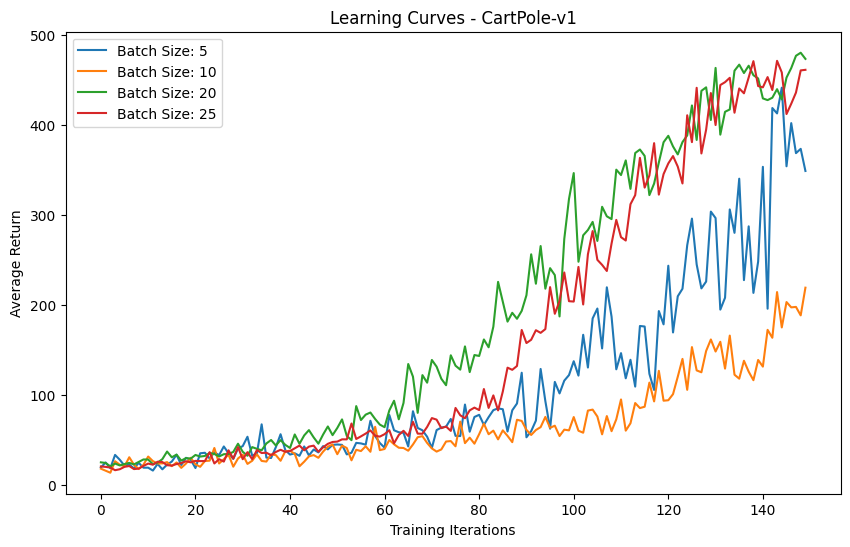

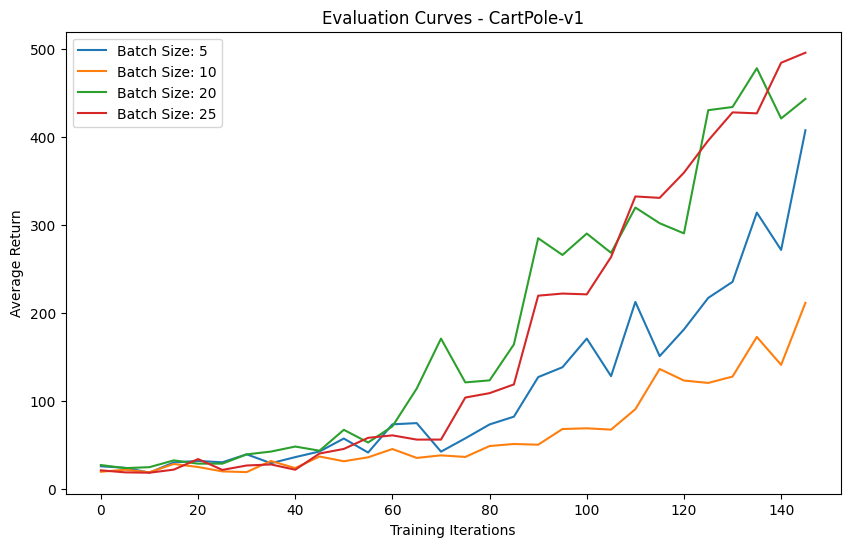

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import gym


batch_sizes = [5, 10, 20, 25]
env_name = "CartPole-v1"
n_train_iterations = 150
evaluation_freq = 5

learning_curves = []
eval_curves = []

for batch_size in batch_sizes:

    vpg = VanillaPolicyGradient(env_name, n_train_iterations, batch_size, gamma=0.99, lr=0.003)


    learning_curve, eval_curve = vpg.train(evaluation_freq=evaluation_freq)


    learning_curves.append(learning_curve)
    eval_curves.append(eval_curve)


x = np.arange(0, n_train_iterations)
plt.figure(figsize=(10, 6))
for i, batch_size in enumerate(batch_sizes):
    plt.plot(x, learning_curves[i], label=f"Batch Size: {batch_size}")
plt.xlabel("Training Iterations")
plt.ylabel("Average Return")
plt.legend()
plt.title(f"Learning Curves - {env_name}")
plt.show()


x = np.arange(0, n_train_iterations, evaluation_freq)
plt.figure(figsize=(10, 6))
for i, batch_size in enumerate(batch_sizes):
    plt.plot(x, eval_curves[i], label=f"Batch Size: {batch_size}")
plt.xlabel("Training Iterations")
plt.ylabel("Average Return")
plt.legend()
plt.title(f"Evaluation Curves - {env_name}")
plt.show()


## 2. LUNAR LANDER

Epoch 0 : The average return of 10 evaluation episodes is : -218.60923809264506
Epoch 10 : The average return of 10 evaluation episodes is : -125.89751011688195
Epoch 20 : The average return of 10 evaluation episodes is : -185.45071858950092
Epoch 30 : The average return of 10 evaluation episodes is : -175.06938714822613
Epoch 40 : The average return of 10 evaluation episodes is : -146.00672313630594
Epoch 50 : The average return of 10 evaluation episodes is : -102.25301687413452
Epoch 60 : The average return of 10 evaluation episodes is : -203.94624431284927
Epoch 70 : The average return of 10 evaluation episodes is : -167.53340451167793
Epoch 80 : The average return of 10 evaluation episodes is : -137.8166661517584
Epoch 90 : The average return of 10 evaluation episodes is : -173.17001936231375
Epoch 100 : The average return of 10 evaluation episodes is : -134.88802194781238
Epoch 110 : The average return of 10 evaluation episodes is : -207.4517758026198
Epoch 120 : The average retur

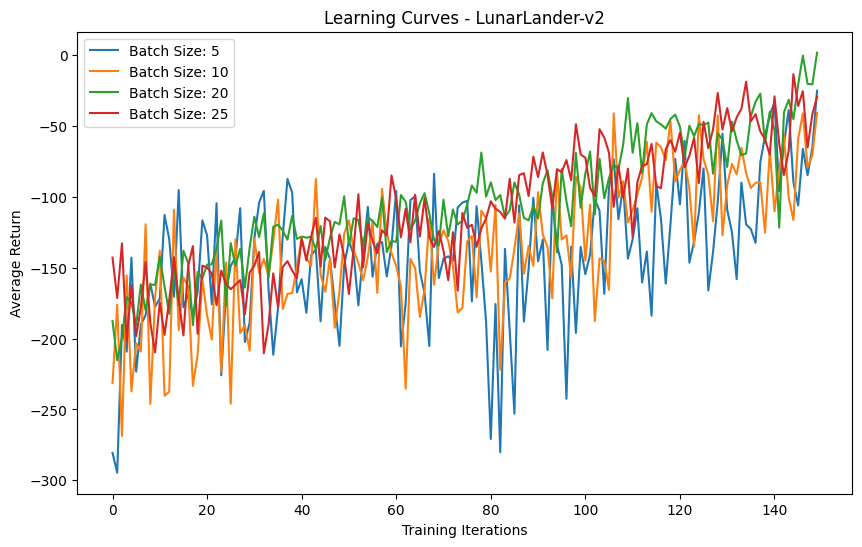

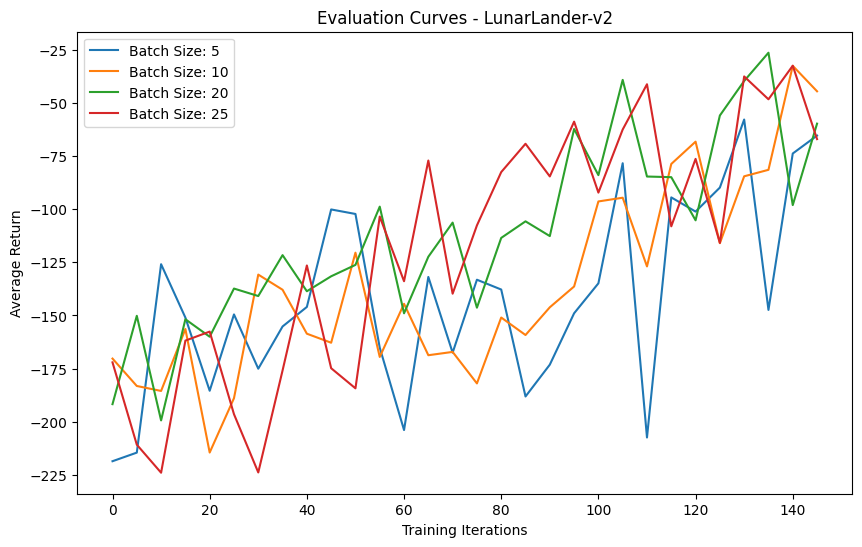

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import gym


batch_sizes = [5, 10, 20, 25]
env_name = "LunarLander-v2"
n_train_iterations = 150
evaluation_freq = 5

learning_curves = []
eval_curves = []

for batch_size in batch_sizes:

    vpg = VanillaPolicyGradient(env_name, n_train_iterations, batch_size, gamma=0.99, lr=0.003)


    learning_curve, eval_curve = vpg.train(evaluation_freq=evaluation_freq)


    learning_curves.append(learning_curve)
    eval_curves.append(eval_curve)

x = np.arange(0, n_train_iterations)
plt.figure(figsize=(10, 6))
for i, batch_size in enumerate(batch_sizes):
    plt.plot(x, learning_curves[i], label=f"Batch Size: {batch_size}")
plt.xlabel("Training Iterations")
plt.ylabel("Average Return")
plt.legend()
plt.title(f"Learning Curves - {env_name}")
plt.show()


x = np.arange(0, n_train_iterations, evaluation_freq)
plt.figure(figsize=(10, 6))
for i, batch_size in enumerate(batch_sizes):
    plt.plot(x, eval_curves[i], label=f"Batch Size: {batch_size}")
plt.xlabel("Training Iterations")
plt.ylabel("Average Return")
plt.legend()
plt.title(f"Evaluation Curves - {env_name}")
plt.show()


## Observations

### On Learning Speed:
- A very small batch size may result in slower learning, as it requires more epochs to achieve high rewards due to noisy estimates.
- Conversely, a very large batch size can slow down training because of the additional computation involved.

### On Variance & Stability:
- Small batch sizes can cause noisier learning curves and less stable training due to **higher variance in policy gradient estimates**.
- Larger batch sizes provide more stable and smoother learning curves, although they may not lead to a proportional improvement in performance.
